In [1]:
from prophet import Prophet
import pandas as pd

In [4]:
d=pd.read_excel(r"C:\Users\prernagupta\Desktop\wovenshirt-uk.xlsx")


In [5]:
d

,TREND,BASE,START_DATE,FSI,NSI,FSI_YHAT_LOWER,FSI_YHAT,FSI_YHAT_UPPER,NSI_YHAT_LOWER,NSI_YHAT,...,MARKDOWN_INDEX,FASHION_LEADERS_INDEX,TRENDING_INDEX,CATWALK_IMPACT,FSI_PIVOT_POINTS,NSI_PIVOT_POINTS,CREATED_AT,CREATED_BY,LEVELS,REGION
0,Woven Shirt Super Woven Shirt Blouse Uk,Apparel,2016-01-04,0.104473,0.112894,0.103820,0.106571,0.109193,0.113963,0.118298,...,1.007842,0.457106,1.089475,0.033023,['2016-01-11'],['2016-01-11'],2021-09-06 16:16:02.596,camillereyes,Super Category,UK
1,Woven Shirt Super Woven Shirt Blouse Uk,Apparel,2016-01-11,0.105798,0.116166,0.104137,0.106760,0.109514,0.115619,0.119687,...,1.006909,0.453720,1.101160,0.067406,['2016-01-11'],['2016-01-11'],2021-09-06 16:16:02.596,camillereyes,Super Category,UK
2,Woven Shirt Super Woven Shirt Blouse Uk,Apparel,2016-01-18,0.106137,0.118901,0.104227,0.106823,0.109549,0.116930,0.121097,...,1.006034,0.450489,1.112067,0.084419,['2016-01-11'],['2016-01-11'],2021-09-06 16:16:02.596,camillereyes,Super Category,UK
3,Woven Shirt Super Woven Shirt Blouse Uk,Apparel,2016-01-25,0.106579,0.121149,0.104071,0.106808,0.109556,0.118272,0.122500,...,1.005215,0.447414,1.122195,0.094971,['2016-01-11'],['2016-01-11'],2021-09-06 16:16:02.596,camillereyes,Super Category,UK
4,Woven Shirt Super Woven Shirt Blouse Uk,Apparel,2016-02-01,0.106888,0.122962,0.104137,0.106789,0.109619,0.119488,0.123855,...,1.004454,0.444494,1.131543,0.105524,['2016-01-11'],['2016-01-11'],2021-09-06 16:16:02.596,camillereyes,Super Category,UK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,Woven Shirt Super Woven Shirt Blouse Uk,Apparel,2022-06-27,NaN,NaN,0.086039,0.089298,0.092374,0.097366,0.101574,...,NaN,NaN,NaN,0.000000,['2016-01-11'],['2016-01-11'],2021-09-06 16:16:02.596,camillereyes,Super Category,UK
339,Woven Shirt Super Woven Shirt Blouse Uk,Apparel,2022-07-04,NaN,NaN,0.086095,0.089354,0.092639,0.096133,0.100409,...,NaN,NaN,NaN,0.000000,['2016-01-11'],['2016-01-11'],2021-09-06 16:16:02.596,camillereyes,Super Category,UK
340,Woven Shirt Super Woven Shirt Blouse Uk,Apparel,2022-07-11,NaN,NaN,0.085969,0.089339,0.092812,0.095015,0.099028,...,NaN,NaN,NaN,0.000000,['2016-01-11'],['2016-01-11'],2021-09-06 16:16:02.596,camillereyes,Super Category,UK
341,Woven Shirt Super Woven Shirt Blouse Uk,Apparel,2022-07-18,NaN,NaN,0.085958,0.089227,0.092453,0.093063,0.097468,...,NaN,NaN,NaN,0.000000,['2016-01-11'],['2016-01-11'],2021-09-06 16:16:02.596,camillereyes,Super Category,UK


In [6]:
d=d.iloc[:, [2,3]]

In [7]:
df=d.dropna()
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

<ipython-input-7-ec1e916fc466>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds']= pd.to_datetime(df['ds'])


In [8]:
df

,ds,y
0,2016-01-04,0.104473
1,2016-01-11,0.105798
2,2016-01-18,0.106137
3,2016-01-25,0.106579
4,2016-02-01,0.106888
...,...,...
286,2021-06-28,0.098955
287,2021-07-05,0.095455
288,2021-07-12,0.092570
289,2021-07-19,0.095965


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


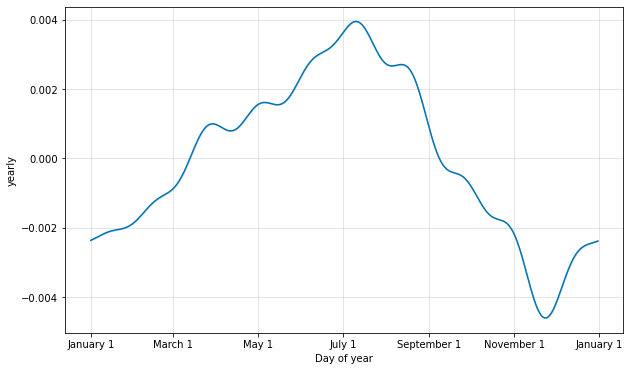

In [9]:
from prophet.plot import plot_yearly
m = Prophet().fit(df)
a = plot_yearly(m)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


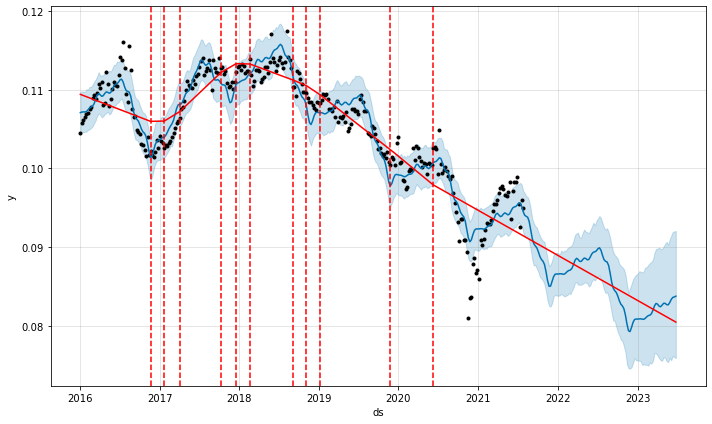

In [10]:
from prophet.plot import add_changepoints_to_plot
m = Prophet()
# define the model
# fit the model
m.fit(df)
future = m.make_future_dataframe(periods=100, freq='W')
#prop only uses weekly seasonlity, and change points for first 80%
fcst = m.predict(future)
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), m, fcst)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


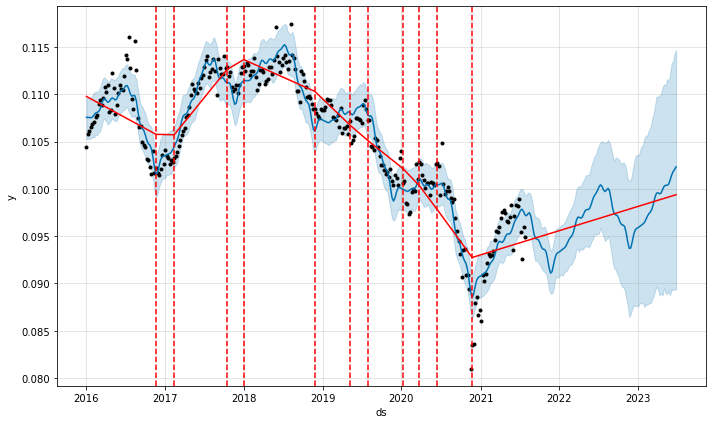

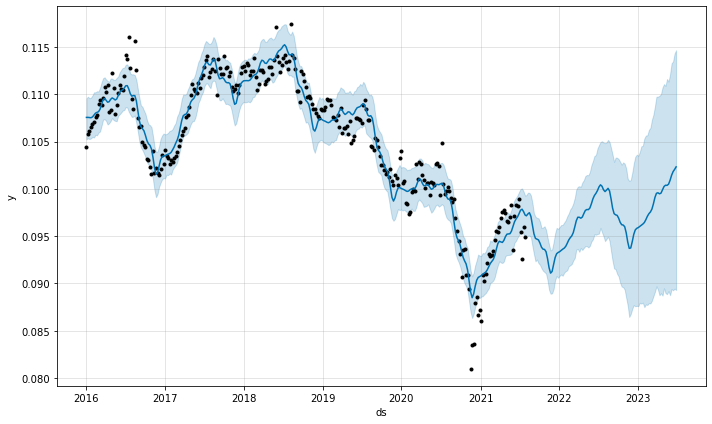

In [11]:
from prophet.plot import add_changepoints_to_plot
m = Prophet(yearly_seasonality=True, changepoint_range=1.0  ,changepoint_prior_scale=0.05, growth='linear')
# define the model
# fit the model
m.fit(df)

future = m.make_future_dataframe(periods=100, freq='W')
#prop only uses weekly seasonlity, and change points for first 80%
fcst = m.predict(future)
fig = m.plot(fcst)
a = add_changepoints_to_plot(fig.gca(), m, fcst)
fig = m.plot(fcst)

In [12]:
fcst

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-04,0.109783,0.105231,0.109584,0.109783,0.109783,-0.002219,-0.002219,-0.002219,-0.002219,-0.002219,-0.002219,0.0,0.0,0.0,0.107563
1,2016-01-11,0.109695,0.105361,0.109752,0.109695,0.109695,-0.002130,-0.002130,-0.002130,-0.002130,-0.002130,-0.002130,0.0,0.0,0.0,0.107566
2,2016-01-18,0.109608,0.105275,0.109592,0.109608,0.109608,-0.002058,-0.002058,-0.002058,-0.002058,-0.002058,-0.002058,0.0,0.0,0.0,0.107550
3,2016-01-25,0.109521,0.105342,0.109653,0.109521,0.109521,-0.001991,-0.001991,-0.001991,-0.001991,-0.001991,-0.001991,0.0,0.0,0.0,0.107530
4,2016-02-01,0.109434,0.105501,0.109888,0.109434,0.109434,-0.001824,-0.001824,-0.001824,-0.001824,-0.001824,-0.001824,0.0,0.0,0.0,0.107610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,2023-05-28,0.099190,0.088752,0.112122,0.087704,0.110484,0.001721,0.001721,0.001721,0.001721,0.001721,0.001721,0.0,0.0,0.0,0.100911
387,2023-06-04,0.099240,0.089412,0.113276,0.087490,0.110731,0.002199,0.002199,0.002199,0.002199,0.002199,0.002199,0.0,0.0,0.0,0.101438
388,2023-06-11,0.099289,0.089277,0.113489,0.087216,0.110965,0.002538,0.002538,0.002538,0.002538,0.002538,0.002538,0.0,0.0,0.0,0.101827
389,2023-06-18,0.099338,0.089443,0.114330,0.087051,0.111194,0.002723,0.002723,0.002723,0.002723,0.002723,0.002723,0.0,0.0,0.0,0.102061


In [13]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')


INFO:prophet:Making 6 forecasts with cutoffs between 2018-02-07 00:00:00 and 2020-07-26 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

In [14]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,0.000005,0.002339,0.001728,0.016263,0.013642,0.016051,0.580645
1,37 days,0.000006,0.002350,0.001744,0.016374,0.013642,0.016160,0.548387
2,39 days,0.000006,0.002412,0.001833,0.017225,0.015337,0.017024,0.516129
3,40 days,0.000007,0.002646,0.002006,0.018752,0.017118,0.018505,0.483871
4,41 days,0.000007,0.002652,0.002012,0.018880,0.017118,0.018649,0.483871


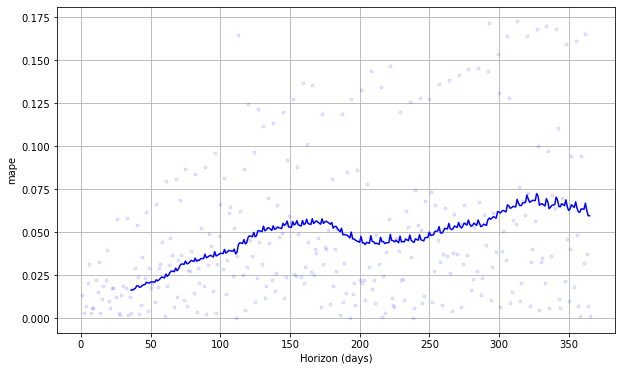

In [16]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')
